In [1]:
from fn_cfg import *
import params as cfg
import dementia_classes

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
#   baseline scans for different dementia classes
base_ND = dementia_classes.scansND_B
base_MILD = dementia_classes.scansMILD_B
base_MOD = dementia_classes.scansMOD_B
base_SD = dementia_classes.scansSEVD_B

In [3]:
#   4-months scans for different dementia classes
four_ND = dementia_classes.scansND_4
four_MILD = dementia_classes.scansMILD_4
four_MOD = dementia_classes.scansMOD_4
four_SD = dementia_classes.scansSEVD_4

In [4]:
#   8-months scans for different dementia classes
eight_ND = dementia_classes.scansND_8
eight_MILD = dementia_classes.scansMILD_8
eight_MOD = dementia_classes.scansMOD_8
eight_SD = dementia_classes.scansSEVD_8

scan name:  0405_1_12042019_1129
['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0405_1_12042019_1129/0405_1_12042019_1129.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


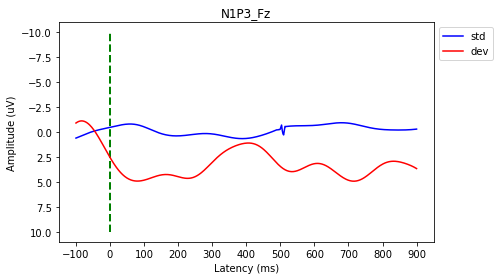

In [5]:
def pipeline_single_NC(device_version,scan_ID,local_path,dispIMG=False):
    """
    single scan pipeline for NC
    Input:  single scan ID, local path to the scan, and device version (1.0 or 1.1)
    Output: 7 x 2 list: [std_Fz,dev_Fz]
                        [std_Cz,dev_Cz]
                        [std_Pz,dev_Pz]
                        [con_Fz,inc_Fz]
                        [con_Cz,inc_Cz]
                        [con_Pz,inc_Pz]
                        [erp_latency,0]
    """
    print("scan name: ",scan_ID)
    device = importFile.neurocatch()
    fileObjects = device.init(device_version,scan_ID,local_path)
    rawEEG = fileObjects[0]
    rawEOG = fileObjects[1]
    rawEEGEOG = fileObjects[2]
    time = fileObjects[3]
    trigOutput = fileObjects[4]
    filtering = filters()
    adaptiveFilterOutput = filtering.adaptive(rawEEG,rawEOG)
    notchFilterOutput = filtering.notch(adaptiveFilterOutput,line,fs)
    bandPassFilterOutput = filtering.butterBandPass(notchFilterOutput,lowcut=0.1,highcut=5,fs=cfg.fs)
    erps = erpExtraction()
    N1P3 = erps.N100P300(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip,dispIMG=dispIMG)
    N4 = erps.N400(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip,dispIMG=dispIMG)
    N1P3_Fz,N1P3_Cz,N1P3_Pz,N4_Fz,N4_Cz,N4_Pz = N1P3[0],N1P3[1],N1P3[2],N4[0],N4[1],N4[2]
    erp_latency = np.array(np.linspace(start=-100, stop=900, num=len(N1P3_Fz[0]),dtype=object),dtype=object)
    std_Fz,dev_Fz,std_Cz,dev_Cz,std_Pz,dev_Pz = N1P3_Fz[0],N1P3_Fz[1],N1P3_Cz[0],N1P3_Cz[1],N1P3_Pz[0],N1P3_Pz[1]
    con_Fz,inc_Fz,con_Cz,inc_Cz,con_Pz,inc_Pz = N4_Fz[0],N4_Fz[1],N4_Cz[0],N4_Cz[1],N4_Pz[0],N4_Pz[1]
    output = std_Fz,dev_Fz,std_Cz,dev_Cz,std_Pz,dev_Pz,con_Fz,inc_Fz,con_Cz,inc_Cz,con_Pz,inc_Pz,erp_latency
    return output

test = pipeline_single_NC(device_version=1.0,
                    scan_ID='0405_1_12042019_1129',
                    local_path='/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset')


plot_ERPs(test[0],test[1],test[12],'N1P3_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)

In [6]:
print(len(base_ND))


eeg_base_ND = []
for i in range(len(base_MILD)):
    eeg_base_ND.append(pipeline_single_NC(device_version=1.0,
                    scan_ID=base_MILD[i][1],
                    local_path='/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset'))


15
scan name:  0045_1_01052019_1040
['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0045_1_01052019_1040/0045_1_01052019_1040.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


scan name:  0085_1_25022019_1113
['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0085_1_25022019_1113/0085_1_25022019_1113.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels
scan name:  0091_1_24042019_1121
['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0091_1_24042019_1121/0091_1_24042019_1121.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels
scan name:  0093_1_08042019_1205
['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0093_1_08042019_1205/0093_1_08042019_1205.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels
scan name:  0111_2_19032019_1039
['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0111_2_19032019_1039/0111_2_19032019_1039.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels
scan name:  0405_2_12042019_1135
['/Users/joshuaighalo/Downloads/EEG_Dat